### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

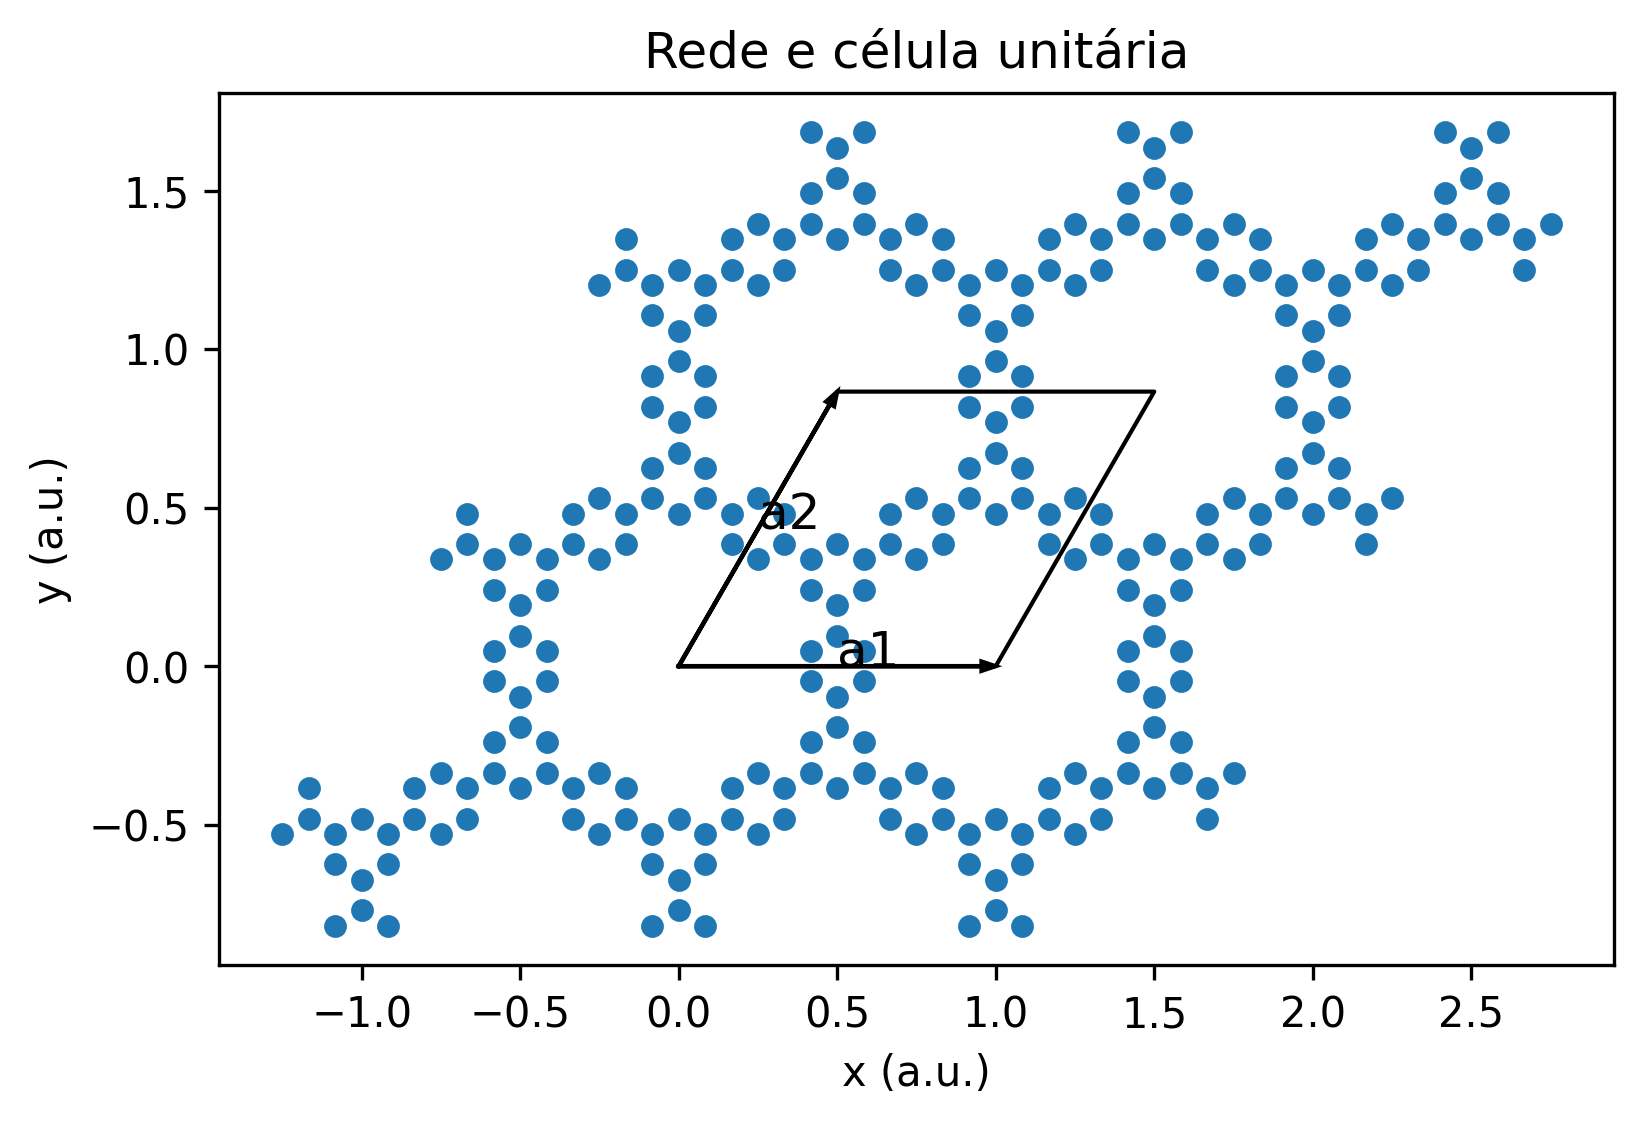

In [50]:
# --- Importação das bibliotecas necessárias ---
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh, lstsq, norm

# --- Dados fornecidos: vetores de rede e posições atômicas fracionárias ---
# 'lat' define os vetores primitivos da rede bidimensional (em unidades arbitrárias)
lat = np.array([[1.0, 0.0], 
                [0.5, np.sqrt(3.0)/2.0]])

# 'orb_frac' contém as coordenadas fracionárias dos orbitais (átomos) dentro da célula unitária
orb_frac = np.array([
[(2.+1./3.)/6. , (1./3.)/6.],
[(2.+2./3.)/6. , (2./3.)/6.],
[(3.+1./3.)/6. , (1./3.)/6.],
[(3.+2./3.)/6. , (5.+2./3.)/6.],
[(3.+1./3.)/6. , (5.+1./3.)/6.],
[(2.+2./3.)/6. , (5.+2./3.)/6.],
[(5.+1./3.)/6. , (3.+1./3.)/6.],
[(5.+2./3.)/6. , (3.+2./3.)/6.],
[(1./3.)/6. , (3.+1./3.)/6.],
[(2./3.)/6. , (2.+2./3.)/6.],
[(1./3.)/6. , (2.+1./3.)/6.],
[(5.+2./3.)/6. , (2.+2./3.)/6.],
[(2.+1./3.)/6. , (3.+1./3.)/6.],
[(2.+2./3.)/6. , (3.+2./3.)/6.],
[(3.+1./3.)/6. , (3.+1./3.)/6.],
[(3.+2./3.)/6. , (2.+2./3.)/6.],
[(3.+1./3.)/6. , (2.+1./3.)/6.],
[(2.+2./3.)/6. , (2.+2./3.)/6.],
[(1.+1./3.)/6. , (2.+1./3.)/6.],
[(1.+2./3.)/6. , (2.+2./3.)/6.],
[(2.+1./3.)/6. , (2.+1./3.)/6.],
[(2.+2./3.)/6. , (1.+2./3.)/6.],
[(2.+1./3.)/6. , (1.+1./3.)/6.],
[(1.+2./3.)/6. , (1.+2./3.)/6.],
[(3.+1./3.)/6. , (4.+1./3.)/6.],
[(3.+2./3.)/6. , (4.+2./3.)/6.],
[(4.+1./3.)/6. , (4.+1./3.)/6.],
[(4.+2./3.)/6. , (3.+2./3.)/6.],
[(4.+1./3.)/6. , (3.+1./3.)/6.],
[(3.+2./3.)/6. , (3.+2./3.)/6.]
])

# Converte coordenadas fracionárias em coordenadas cartesianas (x, y)
orb_cart = orb_frac[:,0,None]*lat[0] + orb_frac[:,1,None]*lat[1]
Norb = len(orb_frac)  # número total de orbitais (átomos na célula unitária)

# --- Plotagem da rede e da célula unitária ---
fig1 = plt.figure(figsize=(6,6), dpi=300)
ax = fig1.add_subplot(111)

# Para melhor visualização, desenhamos não apenas a célula unitária, 
# mas também cópias (imagens) nas células vizinhas
images = []
for i in [-1,0,1]:      # deslocamento em torno da célula central
    for j in [-1,0,1]:
        shift = i*lat[0] + j*lat[1]       # vetor de deslocamento
        images.append(orb_cart + shift)   # aplica o deslocamento aos orbitais
images = np.vstack(images)

# Plota os pontos (átomos/orbitais)
ax.scatter(images[:,0], images[:,1], s=20)

# Desenha os vetores de rede a1 e a2 a partir da origem
ax.arrow(0, 0, lat[0,0], lat[0,1], head_width=0.03, length_includes_head=True, color='black')
ax.arrow(0, 0, lat[1,0], lat[1,1], head_width=0.03, length_includes_head=True, color='black')
ax.text(lat[0,0]*0.5, lat[0,1]*0.5, 'a1', fontsize=12)
ax.text(lat[1,0]*0.5, lat[1,1]*0.5, 'a2', fontsize=12)

# Desenha o contorno da célula unitária (polígono formado pelos vetores de rede)
uc = np.array([[0,0], lat[0], lat[0]+lat[1], lat[1], [0,0]])
ax.plot(uc[:,0], uc[:,1], linestyle='-', linewidth=1, color='black')

# Ajustes visuais do gráfico
ax.set_aspect('equal')          # mantém proporção 1:1 entre eixos x e y
ax.set_xlabel('x (a.u.)')       # rótulo do eixo x
ax.set_ylabel('y (a.u.)')       # rótulo do eixo y
ax.set_title('Rede e célula unitária')  # título do gráfico
plt.show()



----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.5     0.     ]
 [0.33333 0.33333]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[ 0.       0.     ]
 [ 0.5     -0.28868]
 [ 0.33333  0.19245]
 [ 0.       0.     ]]
list of segments:
  length = 0.57735  from  [0. 0.]  to  [0.5 0. ]
  length = 0.50918  from  [0.5 0. ]  to  [0.33333 0.33333]
  length =  0.3849  from  [0.33333 0.33333]  to  [0. 0.]
node distance list: [0.      0.57735 1.08653 1.47143]
node index list:    [  0  78 147 199]
----- k_path report end ------------



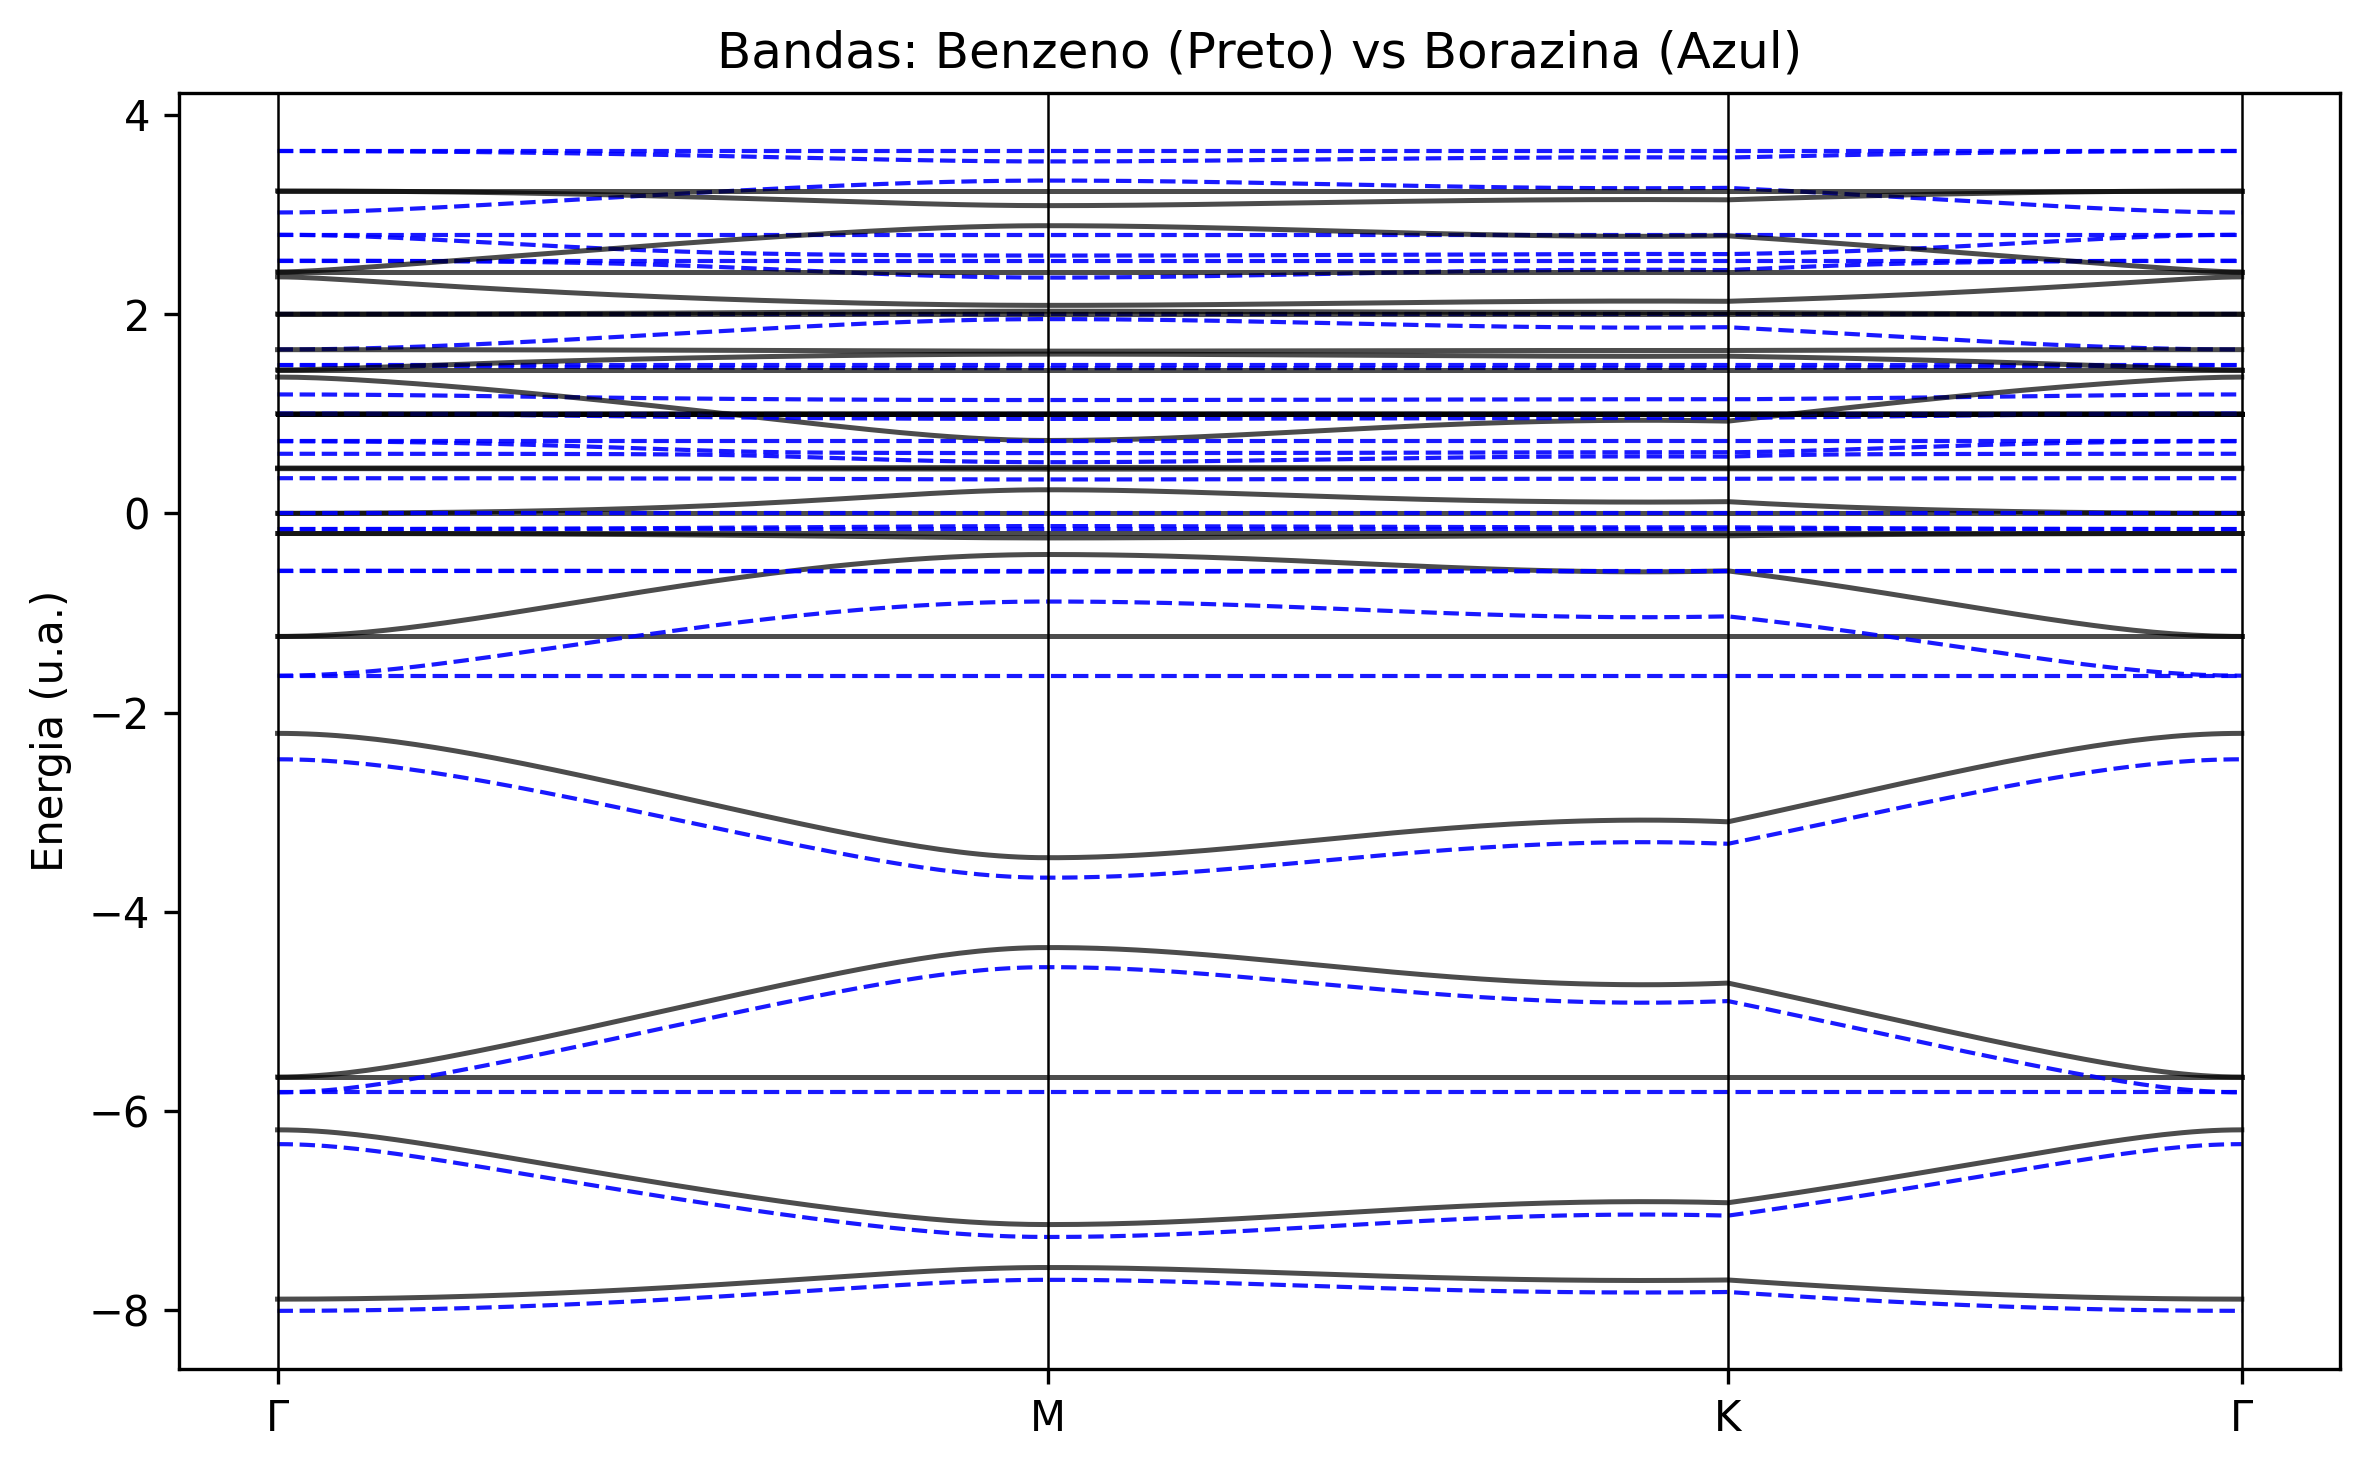

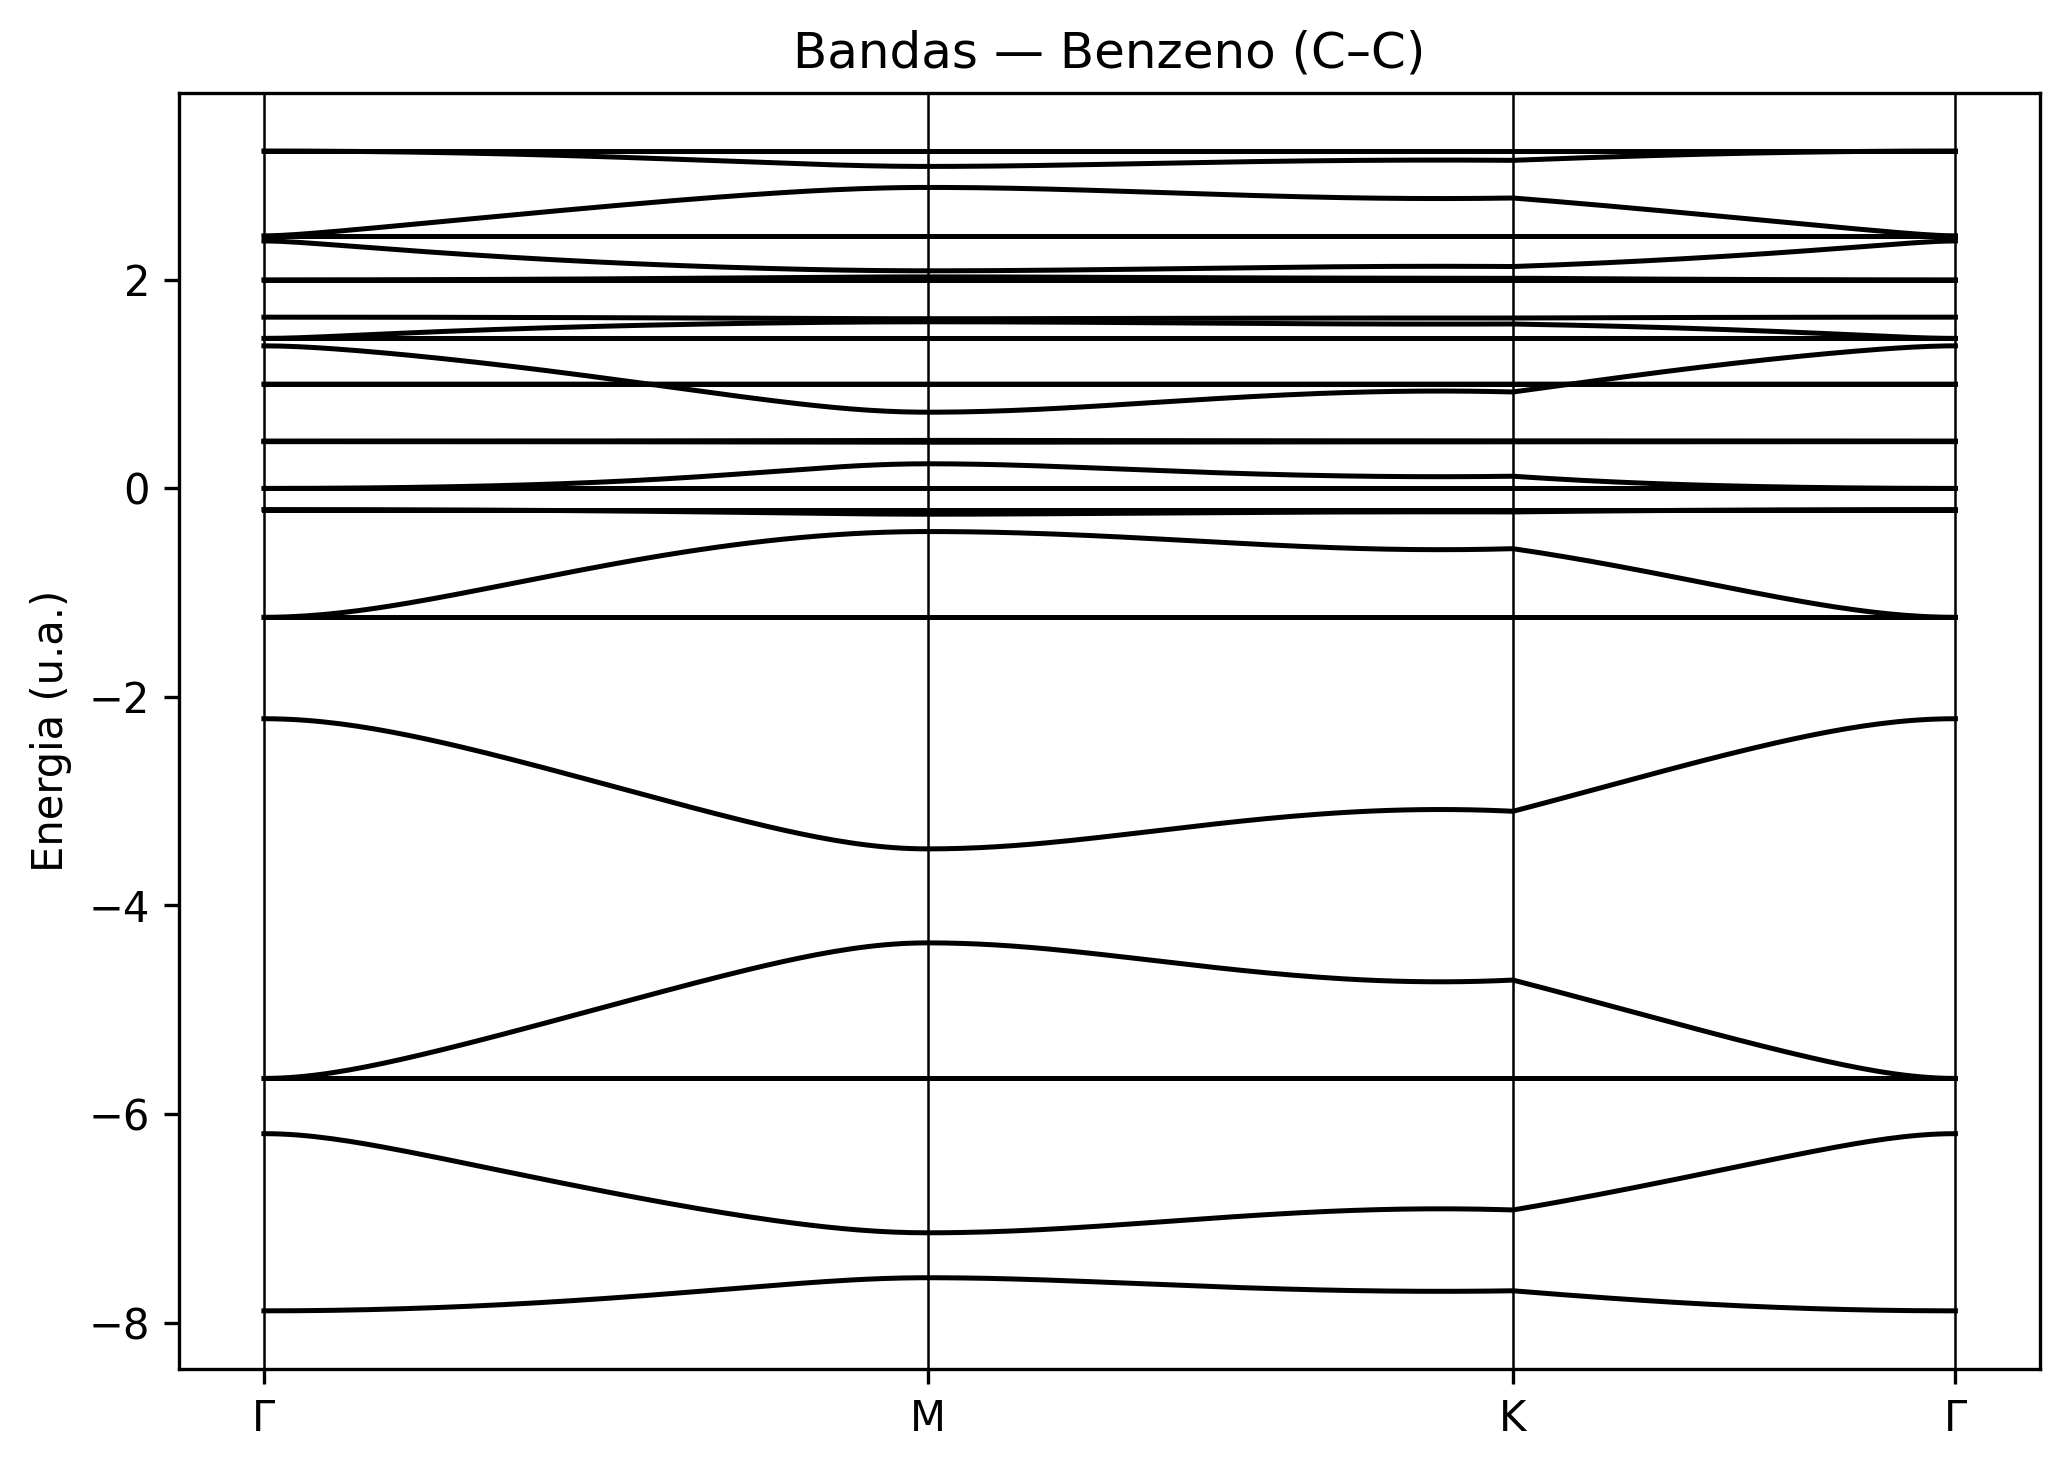

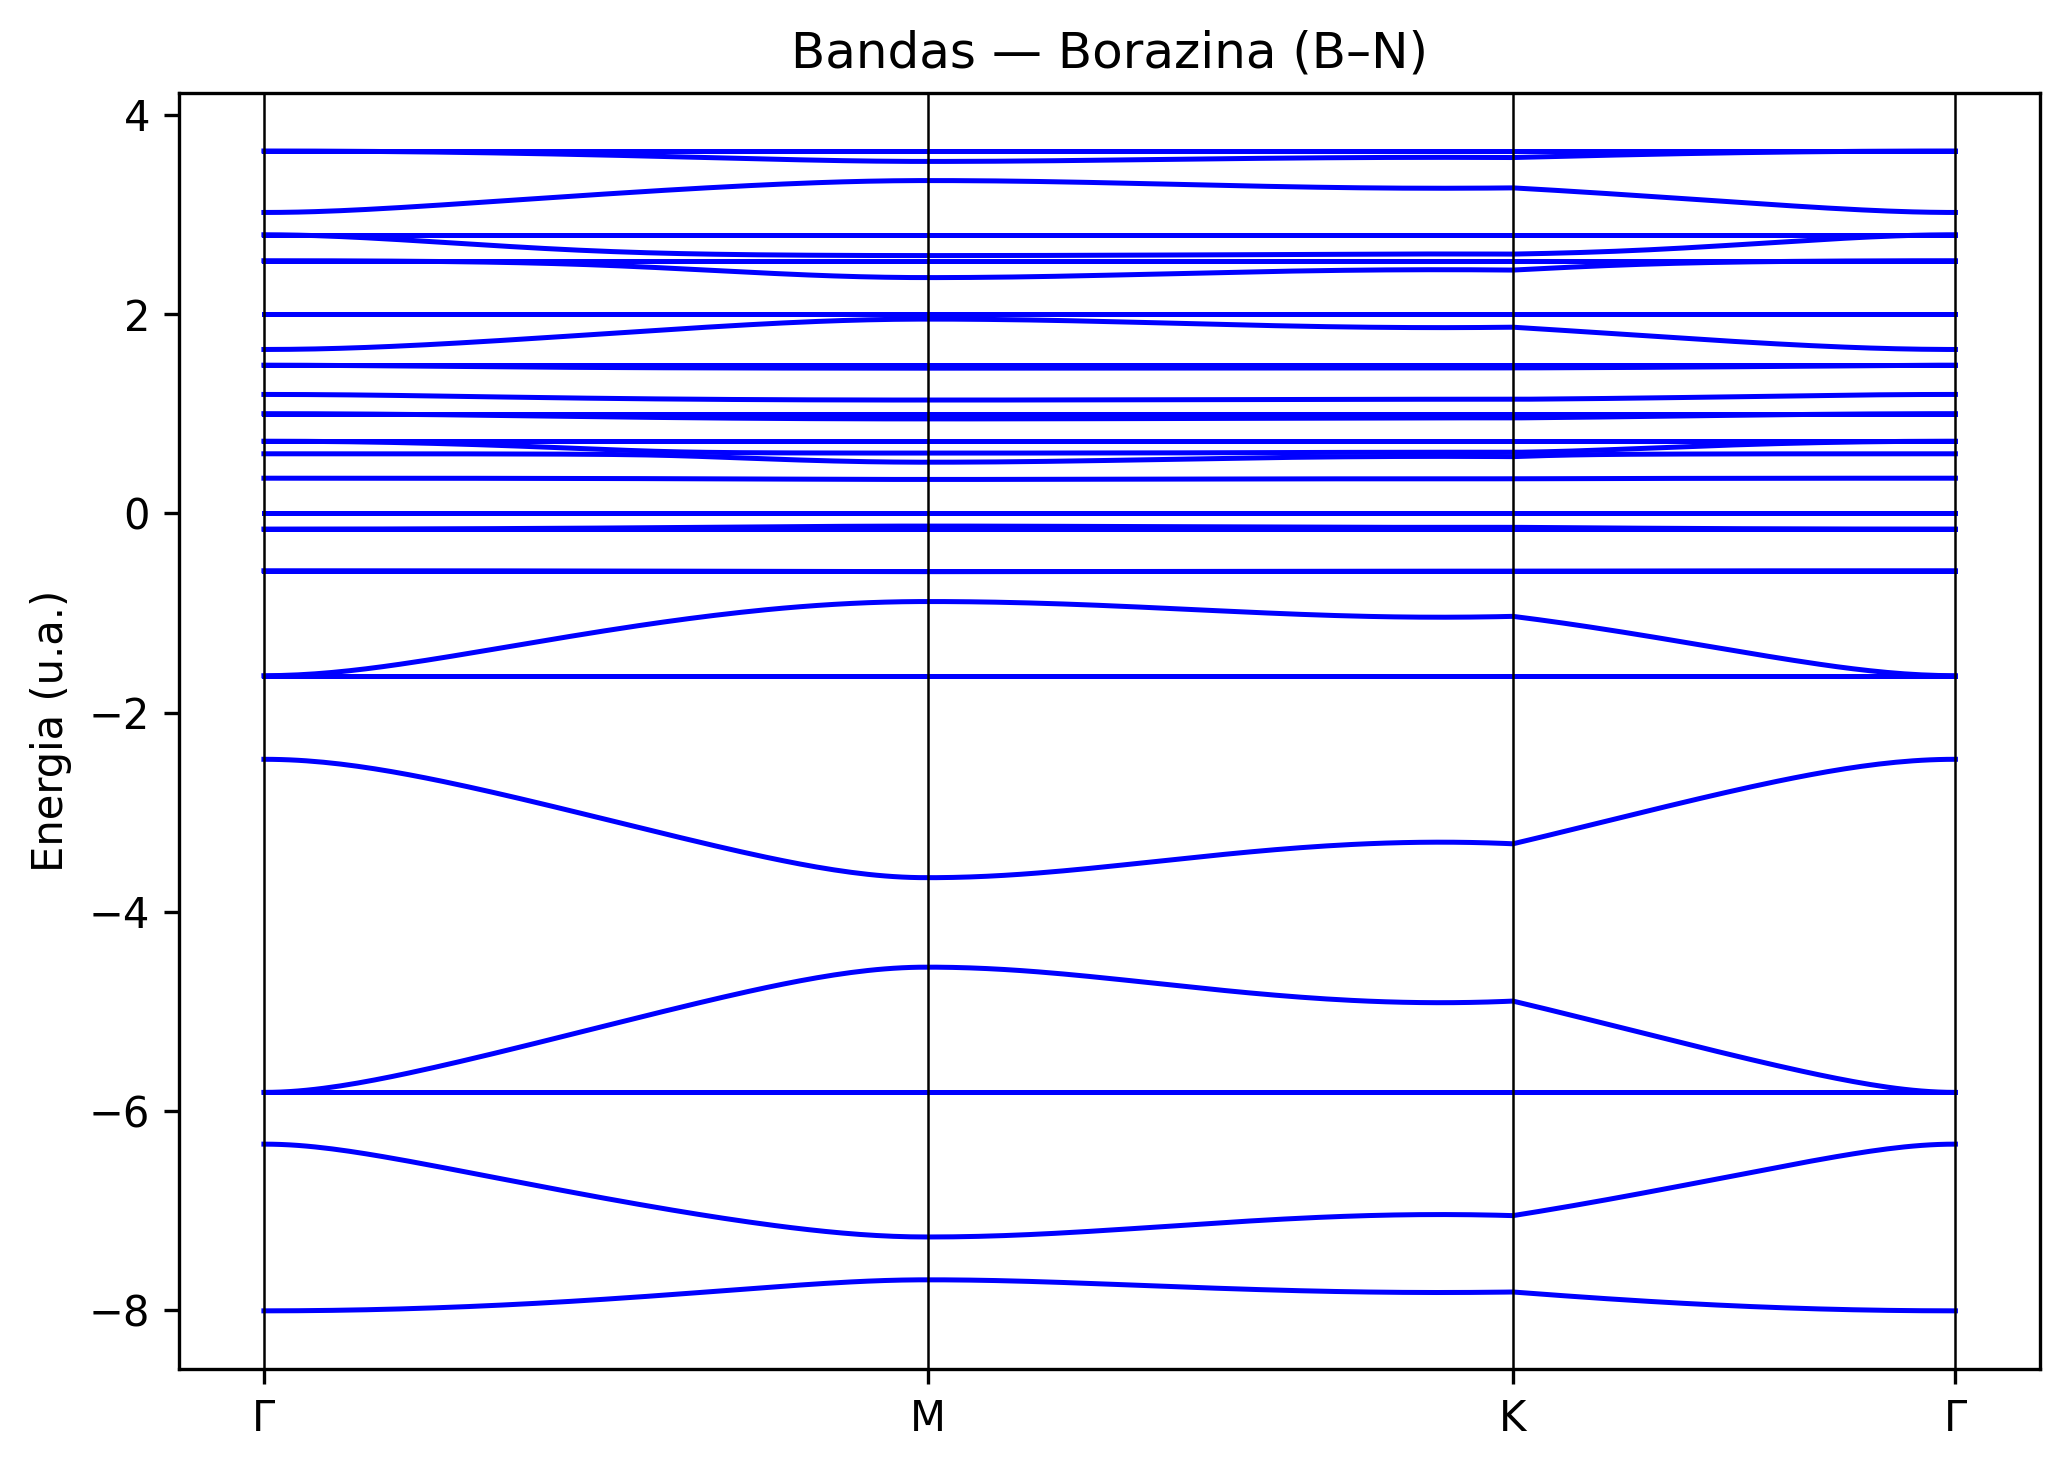

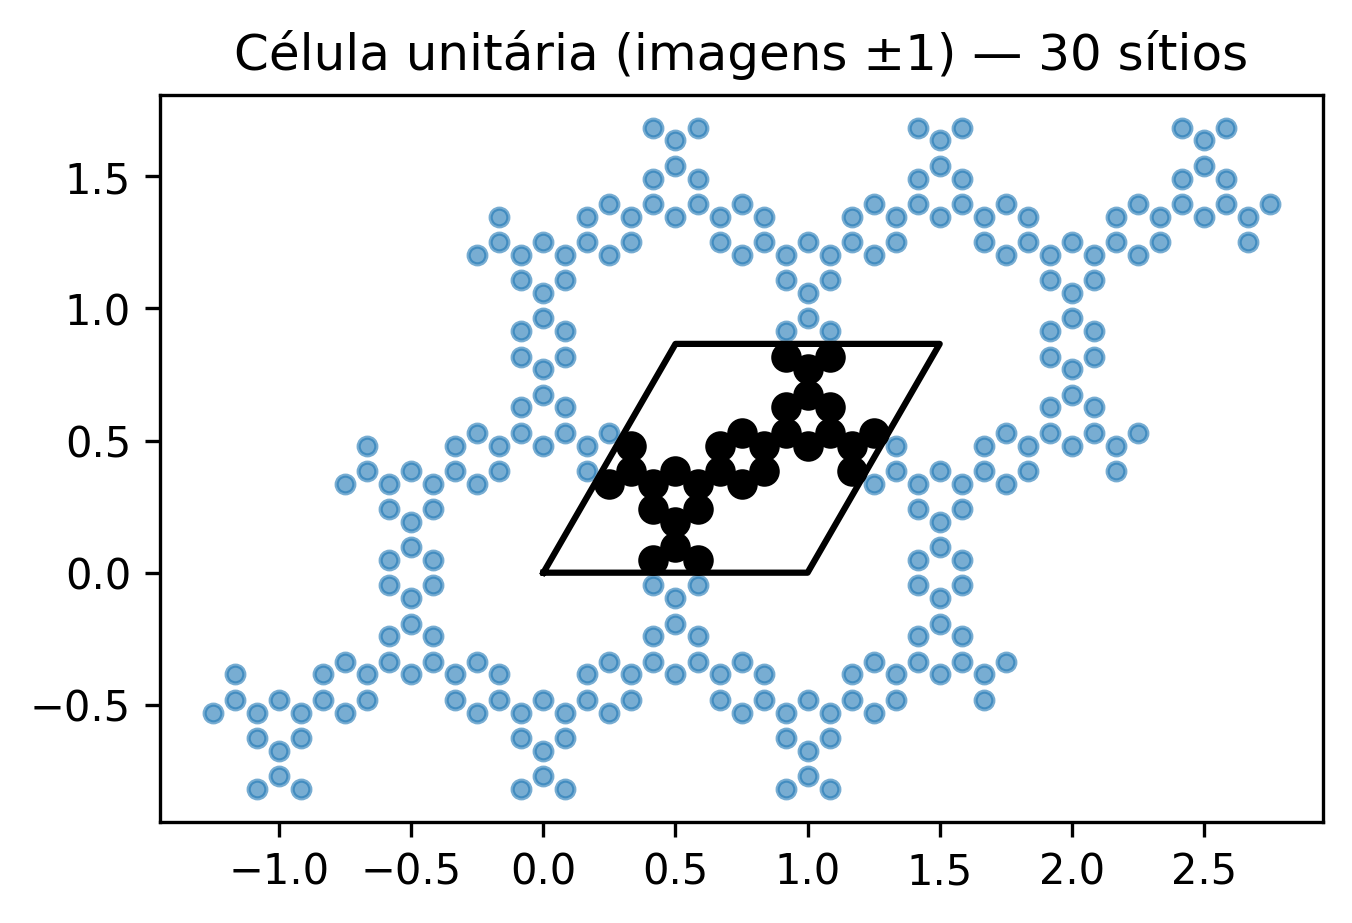

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from pythtb import tb_model

# ---------------------------
# 1) Dados (exatos que passou)
# ---------------------------
lat = np.array([[1.0, 0.0],
                [0.5, np.sqrt(3.0)/2.0]])

orb_frac = np.array([
[(2.+1./3.)/6. , (1./3.)/6.],
[(2.+2./3.)/6. , (2./3.)/6.],
[(3.+1./3.)/6. , (1./3.)/6.],
[(3.+2./3.)/6. , (5.+2./3.)/6.],
[(3.+1./3.)/6. , (5.+1./3.)/6.],
[(2.+2./3.)/6. , (5.+2./3.)/6.],
[(5.+1./3.)/6. , (3.+1./3.)/6.],
[(5.+2./3.)/6. , (3.+2./3.)/6.],
[(1./3.)/6. , (3.+1./3.)/6.],
[(2./3.)/6. , (2.+2./3.)/6.],
[(1./3.)/6. , (2.+1./3.)/6.],
[(5.+2./3.)/6. , (2.+2./3.)/6.],
[(2.+1./3.)/6. , (3.+1./3.)/6.],
[(2.+2./3.)/6. , (3.+2./3.)/6.],
[(3.+1./3.)/6. , (3.+1./3.)/6.],
[(3.+2./3.)/6. , (2.+2./3.)/6.],
[(3.+1./3.)/6. , (2.+1./3.)/6.],
[(2.+2./3.)/6. , (2.+2./3.)/6.],
[(1.+1./3.)/6. , (2.+1./3.)/6.],
[(1.+2./3.)/6. , (2.+2./3.)/6.],
[(2.+1./3.)/6. , (2.+1./3.)/6.],
[(2.+2./3.)/6. , (1.+2./3.)/6.],
[(2.+1./3.)/6. , (1.+1./3.)/6.],
[(1.+2./3.)/6. , (1.+2./3.)/6.],
[(3.+1./3.)/6. , (4.+1./3.)/6.],
[(3.+2./3.)/6. , (4.+2./3.)/6.],
[(4.+1./3.)/6. , (4.+1./3.)/6.],
[(4.+2./3.)/6. , (3.+2./3.)/6.],
[(4.+1./3.)/6. , (3.+1./3.)/6.],
[(3.+2./3.)/6. , (3.+2./3.)/6.]
])

# converte para coordenadas cartesianas (em unidades da célula)
orb = np.dot(orb_frac, lat)   # shape (30,2)

Norb = len(orb)

# ---------------------------
# 2) Construção dos modelos
# ---------------------------
t = -1.0          # hopping (unidades arbitrárias)
cutoff = 0.25     # cutoff para primeira vizinhança (ajuste se necessário)
delta_on = 1    # onsite ± para BN (você usou ±0.5 no exemplo)

# Cria modelo para carbono (benzene-like)
model_c = tb_model(2, 2, lat.tolist(), orb_frac.tolist())  # pythtb espera posições fracionárias
# não precisamos setar onsite -> 0 por padrão

# guardaremos a lista de hoppings que adicionarmos
hoppings = []

# Para calcular distâncias corretamente usamos coordenadas cartesianas e imagens R
R_list = [(0,0),(1,0),(0,1),(-1,0),(0,-1),(1,-1),(-1,1)]
for i in range(Norb):
    for j in range(i+1, Norb):
        ri = orb[i]
        rj = orb[j]
        for R in R_list:
            # vetor de translação em cart:
            Rvec = R[0]*lat[0] + R[1]*lat[1]
            dist = np.linalg.norm( (ri - rj) + Rvec )
            if 1e-8 < dist < cutoff:
                # adiciona hopping
                model_c.set_hop(t, i, j, [R[0], R[1]])
                hoppings.append((t, i, j, (R[0], R[1])))
                break  # pare após achar a primeira imagem próxima

# Cria modelo BN (onsite alternado)
model_bn = tb_model(2, 2, lat.tolist(), orb_frac.tolist())
for i in range(Norb):
    # alterna conforme índice (você usou i%2 no exemplo)
    val = +delta_on if (i % 2 == 0) else -delta_on
    model_bn.set_onsite(val, i)

# Copiar hoppings criados para model_bn
for (tval, i, j, Rvec) in hoppings:
    model_bn.set_hop(tval, i, j, [Rvec[0], Rvec[1]])

# ---------------------------
# 3) Caminho de alta simetria
# ---------------------------
# note: rota = Gamma (0,0) -> M (0.5,0) -> K (1/3,1/3) -> Gamma
path = [[0.0, 0.0], [0.5, 0.0], [1/3, 1/3], [0.0, 0.0]]
labels = [r'$\Gamma$', 'M', 'K', r'$\Gamma$']
kpts_segment = 200
k_vec, k_dist, k_node = model_c.k_path(path, kpts_segment)

# ---------------------------
# 4) Resolver bandas
# ---------------------------
evals_c = model_c.solve_all(k_vec)    # shape (Nbands, Nk)
evals_bn = model_bn.solve_all(k_vec)

# ---------------------------
# 5) Plots finais
# ---------------------------

# (A) Bandas SOBREPOSTAS (C sólido, BN tracejado laranja)
plt.figure(figsize=(8,5), dpi=300)
for n in range(len(evals_c)):
    plt.plot(k_dist, evals_c[n], color='black', lw=1.2, alpha=0.7)
    plt.plot(k_dist, evals_bn[n], color='blue', lw=1.0, linestyle='--', alpha=0.9)
for kd in k_node:
    plt.axvline(kd, color='black', lw=0.6)
plt.xticks(k_node, labels)
plt.ylabel('Energia (u.a.)')
plt.title('Bandas: Benzeno (Preto) vs Borazina (Azul)')
plt.tight_layout()
plt.show()

# (B) Bandas SÓ Benzeno
plt.figure(figsize=(7,5),dpi=300)
for band in evals_c:
    plt.plot(k_dist, band, color='black', lw=1.2)
for kd in k_node:
    plt.axvline(kd, color='black', lw=0.6)
plt.xticks(k_node, labels)
plt.ylabel('Energia (u.a.)')
plt.title('Bandas — Benzeno (C–C)')
plt.tight_layout()
plt.show()

# (C) Bandas SÓ Borazina
plt.figure(figsize=(7,5), dpi=300)
for band in evals_bn:
    plt.plot(k_dist, band, color='blue', lw=1.2)
for kd in k_node:
    plt.axvline(kd, color='black', lw=0.6)
plt.xticks(k_node, labels)
plt.ylabel('Energia (u.a.)')
plt.title('Bandas — Borazina (B–N)')
plt.tight_layout()
plt.show()

# (D) Opcional: plota célula unitária (cartesiana) com imagens para contexto
plt.figure(figsize=(5,5),dpi=300)
# plota imagens -1..1 para contexto
images = []
for i in [-1,0,1]:
    for j in [-1,0,1]:
        shift = i*lat[0] + j*lat[1]
        imgs = orb + shift
        plt.scatter(imgs[:,0], imgs[:,1], s=18, color='C0', alpha=0.6)
# marca célula unitária
uc = np.array([[0,0], lat[0], lat[0]+lat[1], lat[1], [0,0]])
plt.plot(uc[:,0], uc[:,1], color='k')
plt.scatter(orb[:,0], orb[:,1], s=40, color='k')
plt.gca().set_aspect('equal')
plt.title('Célula unitária (imagens ±1) — 30 sítios')
plt.show()
